**pca** A Python Package for Principal Component Analysis. The core of PCA is build on sklearn functionality to find maximum compatibility when combining with other packages.

But this package can do a lot more. Besides the regular pca, it can also perform **SparsePCA**, and **TruncatedSVD**. Depending on your input data, the best approach will be choosen.

Other functionalities are:
  * **Biplot** to plot the loadings
  * Determine the **explained variance**
  * Extract the best performing **features**
  * Scatter plot with the **loadings**
  * Outlier detection using **Hotelling T2 and/or SPE/Dmodx**

This notebook will show some examples.

More information can be found here:

* [github pca](https://github.com/erdogant/pca)



In [1]:
!pip install pca

Lets check the version

In [2]:
import pca
print(pca.__version__)

1.7.2


Import the pca library

In [3]:
from pca import pca
import numpy as np
import pandas as pd

Here we will create a random dataset.

In [4]:
# Dataset
from sklearn.datasets import load_iris
X = pd.DataFrame(data=load_iris().data, columns=load_iris().feature_names, index=load_iris().target)

Initialize using specified parameters. The parameters here are the default parameters.

In [5]:
# Initialize
model = pca(n_components=3, normalize=True)

In [6]:
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


[pca] >Plot PC1 vs PC2 with loadings.


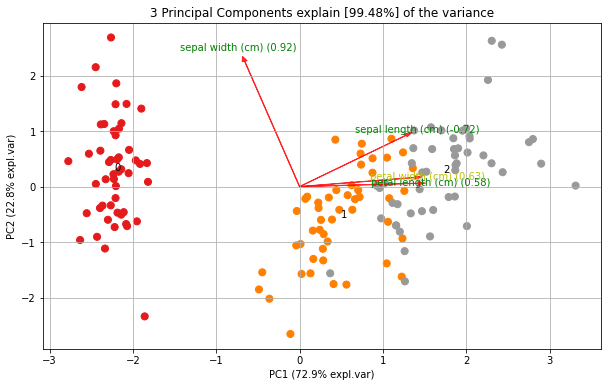

In [7]:
# Make plot with only the directions (no scatter)
fig, ax = model.biplot(textlabel=True, legend=False, figsize=(10, 6))

[pca] >Plot PC1 vs PC2 with loadings.


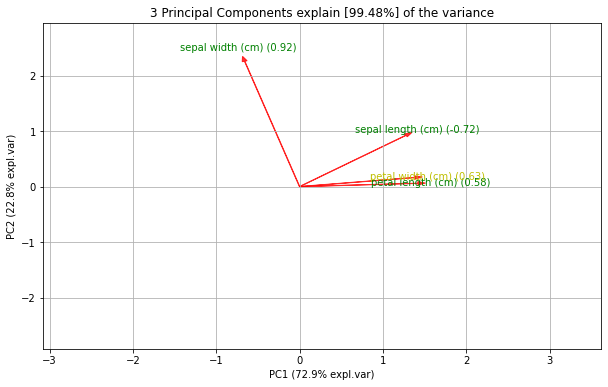

In [8]:
# Make plot with only the directions (no scatter)
fig, ax = model.biplot(cmap=None, textlabel=False, legend=False, figsize=(10, 6))

In [9]:
from pca import pca
# Load example data
from sklearn.datasets import load_iris
X = pd.DataFrame(data=load_iris().data, columns=load_iris().feature_names, index=load_iris().target)

In [10]:
# Initialize
model = pca(n_components=3)
# Fit using PCA
results = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


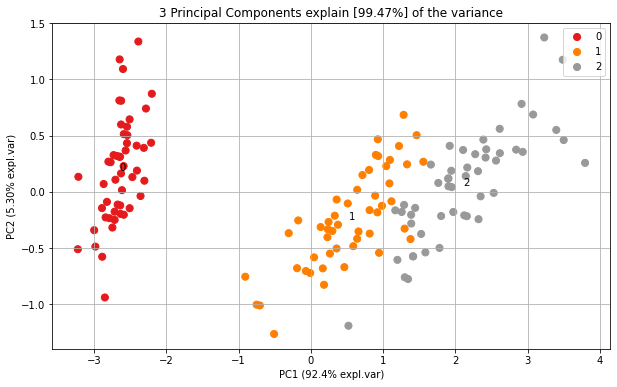

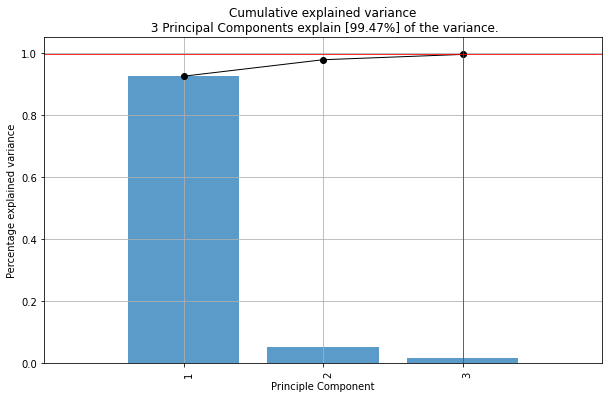

[pca] >Plot PC1 vs PC2 with loadings.


<Figure size 432x288 with 0 Axes>

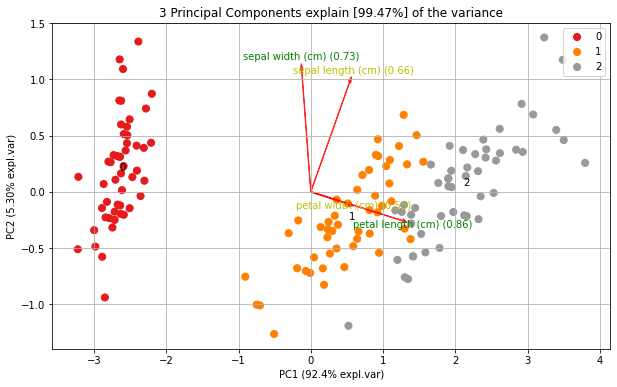

In [11]:
# Make plots

# Scree plot
fig, ax = model.plot(figsize=(10, 6))

# Scatter plot
fig, ax = model.scatter(figsize=(10, 6))

# Biplot
fig, ax = model.biplot(figsize=(10, 6))


[pca] >Plot PC1 vs PC2 with loadings.


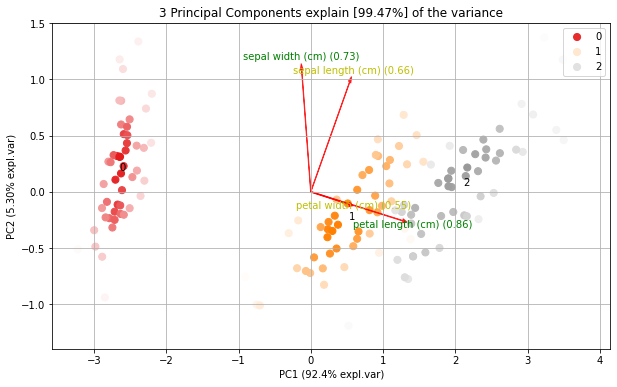

In [17]:
# Coloring on density to focus on the core samples.

# Biplot
fig, ax = model.biplot(figsize=(10, 6), gradient='#ffffff')


In [18]:
# Outliers are stored in results:
results['outliers']

# Outliers based on T2
print('--------T2------------')
print(results['outliers'].loc[results['outliers']['y_bool'], :])

# Outliers based on SPE
print('--------SPE------------')
print(results['outliers'].loc[results['outliers']['y_bool_spe'], :])


--------T2------------
    y_proba    y_score  y_bool  y_bool_spe  y_score_spe
2  0.040551  13.160880    True        True     3.679935
2  0.034521  13.593534    True       False     3.804358
--------SPE------------
    y_proba    y_score  y_bool  y_bool_spe  y_score_spe
0  0.156357   9.320166   False        True     2.895547
0  0.179867   8.889872   False        True     2.735616
0  0.210964   8.389033   False        True     2.745924
0  0.332472   6.875952   False        True     2.366655
0  0.195760   8.625509   False        True     2.770926
0  0.177125   8.937469   False        True     2.819291
0  0.127482   9.933473   False        True     3.000718
1  0.807398   3.011533   False        True     1.253392
1  0.737415   3.549180   False        True     1.364033
1  0.800469   3.066391   False        True     1.233293
2  0.697011   3.849676   False        True     1.301674
2  0.123935  10.017078   False        True     3.019967
2  0.040551  13.160880    True        True     3.679935
2

[pca] >Plot PC1 vs PC2 with loadings.


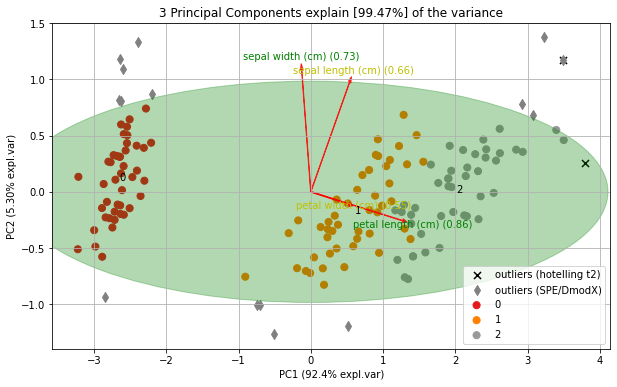

In [20]:
# Outlier detection
fig, ax = model.biplot(SPE=True, HT2=True, figsize=(10, 6))

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


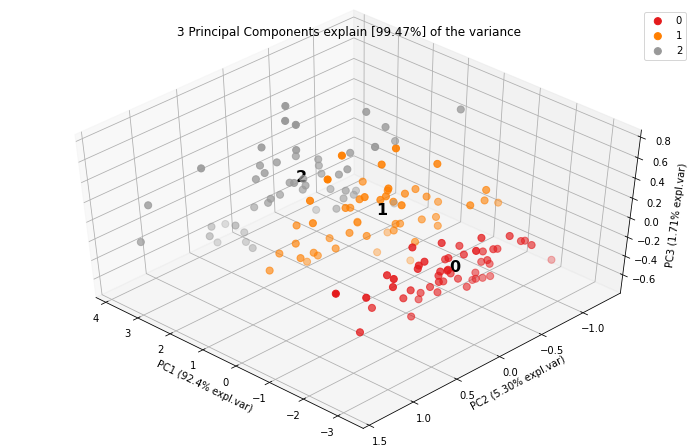

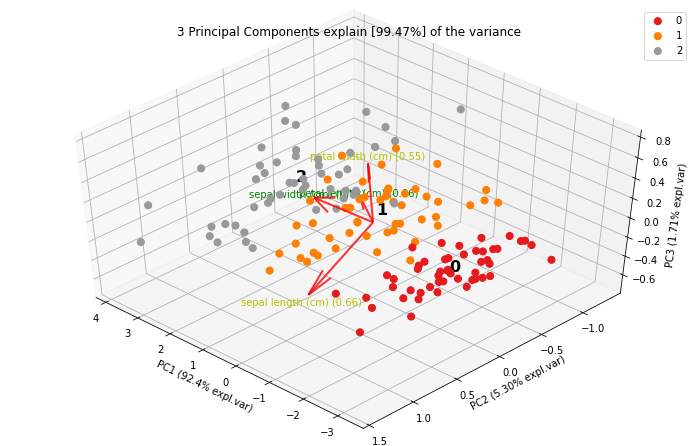

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


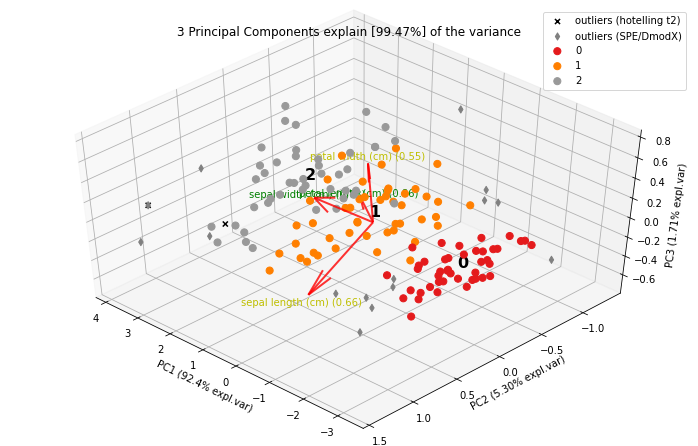

In [21]:
# 3D plots
fig, ax = model.scatter3d(figsize=(10, 6))
fig, ax = model.biplot3d(figsize=(10, 6))
fig, ax = model.biplot3d(SPE=True, HT2=True, figsize=(10, 6))

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


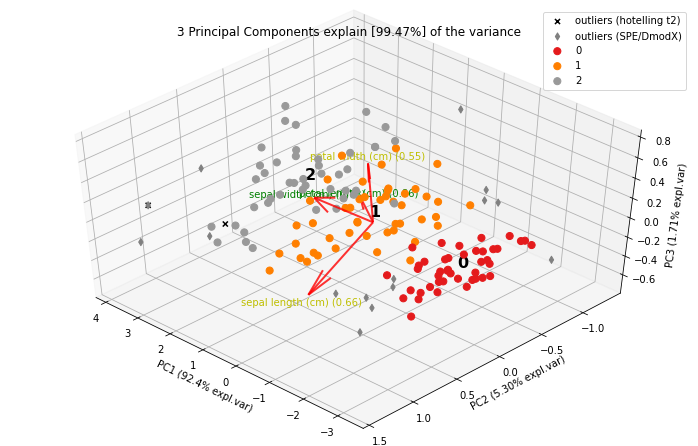

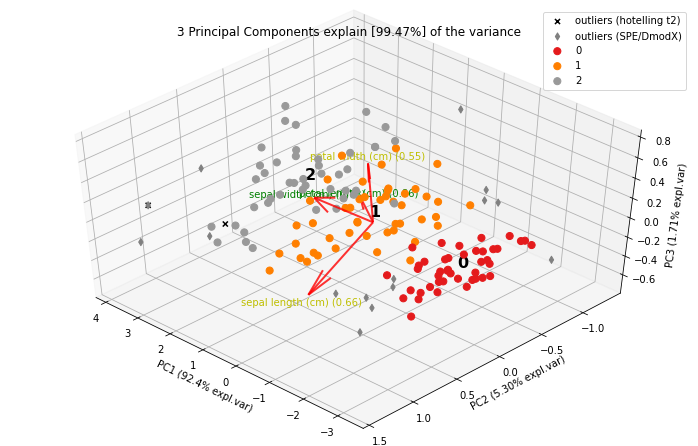

In [22]:
fig, ax = model.biplot3d(SPE=True, HT2=True, visible=False, figsize=(10, 6))

# Set the figure again to True and show the figure.
fig.set_visible(True)
fig

In [23]:
# Normalize out PCs
X_norm = model.norm(X)

[pca] >Cleaning previous fitted model results..
[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [24]:
print(X_norm)

[[2.49827932 2.78822199 2.73760805 2.64042916]
 [2.17418189 2.28972391 2.19907228 2.29205175]
 [2.37043166 2.24256734 2.25379844 2.32729489]
 [2.43101742 2.10641429 2.20334321 2.2064176 ]
 [2.62149842 2.76834241 2.78567422 2.65152651]
 [2.94051298 3.3602201  3.31931842 3.14971943]
 [2.67073929 2.31133341 2.41744878 2.48386043]
 [2.50867666 2.64467154 2.64574665 2.53260032]
 [2.30124683 1.7971212  1.89540188 2.02990525]
 [2.26048037 2.34694131 2.3476342  2.22636441]
 [2.58633591 3.1829288  3.08815008 2.85878304]
 [2.64229309 2.48124151 2.60195141 2.43586883]
 [2.17050087 2.18859607 2.17296045 2.14463246]
 [2.22850563 1.73933529 1.83573841 1.97457016]
 [2.51342988 3.69899386 3.40633499 3.22411108]
 [3.12251957 3.92933711 3.81764254 3.56603525]
 [2.73975929 3.33063051 3.15369372 3.2019132 ]
 [2.54367435 2.80393612 2.72111917 2.74600693]
 [2.68847085 3.535213   3.37294253 3.11672737]
 [2.83837804 3.0079359  3.03452596 2.8917751 ]
 [2.44219749 3.0011212  2.89896181 2.67386954]
 [2.80226798 